In [1]:
import os
import pandas as pd
os.listdir()

['.config', 'drive', 'sample_data']

In [0]:
cd ..

/content


In [0]:
path='drive/My Drive/Text Analytics/Dataset/'

In [3]:
cd drive/My Drive/Text Analytics/Dataset/

/content/drive/My Drive/Text Analytics/Dataset


In [0]:
test = pd.read_csv('yelp_review.csv')

In [0]:
test.shape[0]

5261668

In [0]:
del test['review_id']
del test['user_id']
del test['business_id']
del test['funny']
del test['cool']

In [0]:
test[test['stars']==1].shape[0]

2925452

In [0]:
  star_count=[]
  for i in range(1,6):
    star_count.append(test[test['stars']==i].shape[0])

In [12]:
star_count

[731363, 438161, 615481, 1223316, 2253347]

In [0]:
stars=None
percent=1
distrib=[50,50]
for i in range(1,6):
  star_count.append(test[test['stars']==i].shape[0])
total_pos_count = star_count[3]+star_count[4]
total_neg_count = star_count[0]+star_count[1]
num_data  = round((test.shape[0])/(percent*100))
if(stars!=None):
  distrib=None
if(stars==None):
    pos_req = round((num_data*distrib[0])/100)
    neg_req = round((num_data*distrib[1])/100)
    pos_test = test['stars']>=4
    neg_test = test['stars']<=2
    pos_test = test[pos_test]
    neg_test = test[neg_test]
    if (pos_req <= total_pos_count and neg_req <= total_neg_count):
      new_pos_df = pos_test.sample(pos_req)
      new_pos_df = new_pos_df.reset_index(drop=True)
      new_neg_df = neg_test.sample(neg_req)
      new_neg_df = new_neg_df.reset_index(drop=True)
      final_df=pd.concat([new_pos_df, new_neg_df], axis=0)
      index1=list(range(1,pos_req+1))
      index2=list(range(pos_req+1,final_df.shape[0]+1))
      index=index1+index2
      final_df.index=index

In [14]:
final_df

,stars,date,text,useful
1,4,2017-11-05,If you this restaurant hasn't already caught y...,0
2,4,2009-07-16,I've always felt bad about the fact that I nev...,1
3,5,2017-07-27,If you want to have a true VIP experience in L...,2
4,4,2010-10-08,Who knew little old Cramerton was hiding a tas...,7
5,5,2012-09-11,Better than the Tao in NYC!\n\nPros: \nExcell...,0
...,...,...,...,...
52612,1,2017-07-14,Rip Off ALERT!!!!!!\nBooking it cost me 300CAD...,5
52613,1,2009-07-16,Beware Spencer's. Horrible customer service. \...,14
52614,2,2017-07-24,Steak was good but it's ridiculous that you ca...,0
52615,2,2011-04-13,I was pretty underwhelmed with this burger. \n...,4


In [15]:
index2=list(range(pos_req+1,final_df.shape[0]-pos_req))
print(pos_req+1)
print(final_df.shape[0])
print(final_df.shape[0]-pos_req)

26309
52616
26308


In [16]:
print(new_pos_df.shape[0])
print(new_neg_df.shape[0])

yoyo=pd.concat([new_pos_df, new_neg_df], axis=0)


26308
26308


In [0]:
pos_test = test['stars']>=4
pos_test = test[pos_test]
neg_test = test['stars']<=2
neg_test = test[neg_test]
avg_test = test['stars']==3
avg_test = test[avg_test]

In [18]:
print(pos_test.shape)
print(neg_test.shape)
print(avg_test.shape)

(3476663, 4)
(1169524, 4)
(615481, 4)


In [0]:
new_pos_df = pos_test.sample(500000)
new_neg_df = neg_test.sample(500000)
new_avg_df = avg_test.sample(500000)

In [40]:
print(new_pos_df.isnull().values.any())
print(new_neg_df.isnull().values.any())
print(new_avg_df.isnull().values.any())

False
False
False


In [0]:
index=list(range(1,500001))
index2=list(range(25001,25004))
index3=index+index2

In [42]:
index3[-5:]

[499999, 500000, 25001, 25002, 25003]

In [0]:
new_pos_df.index = index
new_neg_df.index = index
new_avg_df.index = index

In [0]:
new_pos_df.to_csv('pos_cleaned_25k_yelp.csv',index=False)
new_neg_df.to_csv('neg_cleaned_25k_yelp.csv',index=False)
new_avg_df.to_csv('avg_cleaned_25k_yelp.csv',index=False)

In [44]:
print(new_pos_df.shape)
print(new_neg_df.shape)
print(new_avg_df.shape)

(500000, 4)
(500000, 4)
(500000, 4)


In [0]:
new_pos_df.head(10)

In [0]:
new_neg_df.head(10)

In [0]:
new_avg_df.head(10)

In [0]:
poscounter=0
negcounter=0
avgcounter=0
for a in new_pos_df['useful']:
  if a>=1:
    poscounter+=1
for a in new_neg_df['useful']:
  if a>=1:
    negcounter+=1
for a in new_avg_df['useful']:
  if a>=1:
    avgcounter+=1

In [48]:
print(poscounter)
print(negcounter)
print(avgcounter)

222077
286856
246058


In [0]:

#Removing Useful outliers

posdata = new_pos_df[new_pos_df["useful"] < 5]
negdata = new_neg_df[new_neg_df["useful"] < 5]

In [50]:
poscounter=0
negcounter=0
for a in posdata['useful']:
  if a>=1:
    poscounter+=1
for a in negdata['useful']:
  if a>=1:
    negcounter+=1
print(poscounter)
print(negcounter)

193148
228661


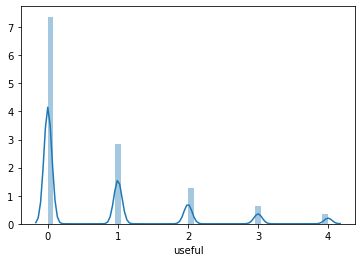

In [51]:
import seaborn as sns
sns.distplot(posdata['useful']);


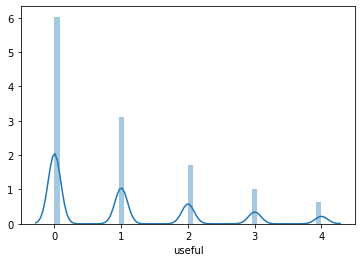

In [52]:
sns.distplot(negdata['useful'])

The above two graphs proves that people are more agreeable and find negative and critical reviews more useful than positive reviews. The reason of this could probably be that the person going through the reviews found more useful details which generally humans tend to explain in detail for discontent rather than the otherway around. While the data is almost equal, (193148 and 228661) out of random 500000 samples, the number of zero votes is half of that of positive reviews for negative reviews.



In [0]:
import os
import pandas as pd
import warnings


def generate_data(csvpath,percent=1,distrib=[50,50]):
  '''
  Generates Data according to the paramters.
  
  csvpath: give directory path to the entire csv file (~3.5GB). Its on GDrive.

  percent: Total entries = 5.26 Million, input the % of this, you want TOTALLY.
           Range = 0 to 100, type = int or float.
           Default = 1

  distrib: This asks for distribution of +ve and -ve reviews.
           positive (>4 stars) and negative (<2 stars) in a list.
           Range = 0 to 100, type = integer. 
           Sample [40,60]. 40% is positive, 60% is negative.
           Default = [50,50]
  '''

  exception_handling(csvpath,percent=percent,distrib=distrib)
  print("Reading CSV....(Might take around 1:30mins to 2mins- 3.5GB file)")
  test = pd.read_csv(csvpath)
  print("Reading Done.")
  del test['review_id']
  del test['user_id']
  del test['business_id']
  del test['funny']
  del test['cool']
  star_count=[]
  for i in range(1,6):
    star_count.append(test[test['stars']==i].shape[0])
  total_pos_count = star_count[3]+star_count[4]
  total_neg_count = star_count[0]+star_count[1]
  num_data  = round((test.shape[0]*percent)/100)
  if(True):
    pos_req = round((num_data*distrib[0])/100)
    neg_req = round((num_data*distrib[1])/100)
    pos_test = test['stars']>=4
    neg_test = test['stars']<=2
    pos_test = test[pos_test]
    neg_test = test[neg_test]
    if (pos_req <= total_pos_count and neg_req <= total_neg_count):
      new_pos_df = pos_test.sample(pos_req)
      new_pos_df = new_pos_df.reset_index(drop=True)
      new_neg_df = neg_test.sample(neg_req)
      new_neg_df = new_neg_df.reset_index(drop=True)
      final_df=pd.concat([new_pos_df, new_neg_df], axis=0)
      index1=list(range(1,pos_req+1))
      index2=list(range(pos_req+1,final_df.shape[0]+1))
      index=index1+index2
      final_df.index=index            
    else:
      if (pos_req <= total_pos_count and neg_req > total_neg_count):
        new_pos_df = pos_test.sample(pos_req)
        new_pos_df = new_pos_df.reset_index(drop=True)
        new_neg_df = neg_test.copy()
        new_neg_df = new_neg_df.reset_index(drop=True)
        final_df=pd.concat([new_pos_df, new_neg_df], axis=0)
        index1=list(range(1,pos_req+1))
        index2=list(range(pos_req+1,final_df.shape[0]+1))
        index=index1+index2
        final_df.index=index
        warnings.warn("\nUnable to satisfy negative reviews due to requirement"+
                      " being larger than availble in original CSV. \n"+
                      "Please modify percent and/or distrib accordingly. \n"+
                      "However used all negative reviews and generated, "+
                      "ratio may not be maintained.")
      if (pos_req > total_pos_count and neg_req <= total_neg_count):
        new_neg_df = neg_test.sample(neg_req)
        new_neg_df = new_neg_df.reset_index(drop=True)
        new_pos_df = pos_test.copy()
        new_pos_df = new_pos_df.reset_index(drop=True)
        final_df=pd.concat([new_neg_df, new_pos_df], axis=0)
        index1=list(range(1,neg_req+1))
        index2=list(range(neg_req+1,final_df.shape[0]+1))
        index=index1+index2
        final_df.index=index
        warnings.warn("\nUnable to satisfy positive reviews due to requirement"+
                      " being larger than availble in original CSV. \n"+
                      "Please modify percent and/or distrib accordingly. \n"+
                      "However used all positive reviews and generated, "+
                      "ratio may not be maintained.")
  print("Data Generated")
  return final_df


def exception_handling(csvpath,percent,distrib):
  '''
  Handles Exception for the function Generate Data
  '''
  if(type(percent)!=float and type(percent)!=int):
    raise TypeError('Percent should be int or float Value.')
  if(percent<0 or percent>100):
    raise ValueError('Percent Value should be between 0 and 100.')
  if(type(distrib)!=list):
    raise TypeError('Distribution parameter must be of list type.')
  if(len(distrib)!=2):
    raise IndexError('The Distribution list must be of length two')
  if(sum(distrib)!=100):
    raise ValueError('The sum of values of list distrib must be 100')
  if not(os.path.exists(csvpath)):
    raise FileNotFoundError('Please give a correct path to the entire Yelp'+
                            ' Review CSV.')

#Sample Code calling Function
#filepath='drive/My Drive/Text Analytics/Dataset/yelp_review.csv'
#data = generate_data(filepath,percent=10)

Reading CSV....(Might take around 1:30mins to 2mins- 3.5GB file)
Reading Done.
Data Generated
